# Gradient Descent and Regularization

This project has three parts:

- **Part I**: Getting Oriented
- **Part II**: Gradient Descent: Linear Regression
- **Part III**: Prediction
- **Part III**: Prediction

---

## Introduction

We will be using a modified version of the [California Housing Prices Dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html ('cal_housing_data_clean.csv'). 

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge

In [2]:
# Load the California Housing Dataset 
cal_df = pd.read_csv('cal_housing_data_clean_ps4.csv')

# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=1948)

cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal
0,3.6885,49,5.184569,1.052950,2363,3.574887,4205.460788,0,2.540
1,3.1630,26,4.267241,0.961207,719,3.099138,28060.624020,0,1.794
2,2.8042,35,3.895018,1.080071,1193,2.122776,20913.168450,0,2.409
3,4.2305,32,5.891775,1.235931,2541,5.500000,21878.282810,0,2.214
4,4.7663,38,5.566038,1.015094,827,3.120755,16863.074990,0,1.916


---

# Part 1: Getting Oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing value and median income in California's census block groups. 

(a) Regress the median housing value `MedHouseVal` on the median income `MedInc`. Draw a scatter plot of housing price (y-axis) against income (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the median housing value on median income and median income squared.  Plot this new (curved) regression line in gold, on the same axes used for part (a). 

(c) Interpret your results.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Users/kaiting/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


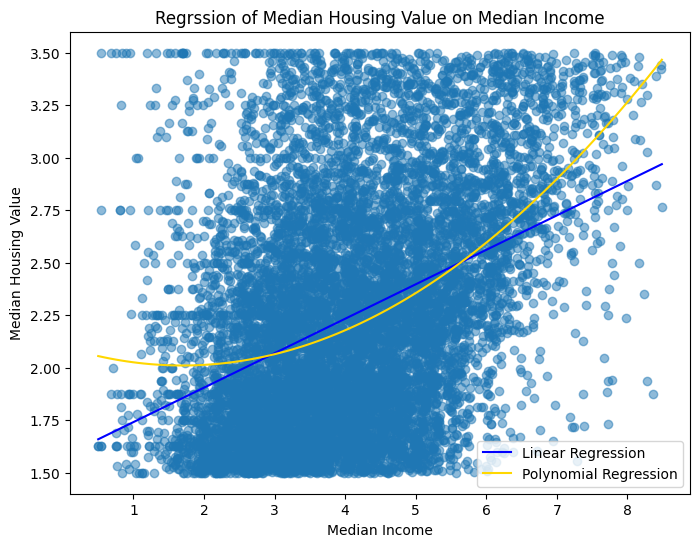

In [3]:
# (a) Linear Regression - Regress MedHouseVal on MedInc
X = cal_df[['MedInc']]
y = cal_df['MedHouseVal']

# Initialize and fit the linear regression model
model_ols = LinearRegression()
model_ols.fit(X, y)

# Predictions for the line
X_range = np.linspace(X.min(), X.max(), 100)
y_ols = model_ols.predict(X_range)


# (b) Polynomial Regression - MedHouseVal on MedInc and MedInc squared
X_poly = cal_df[['MedInc']]
X_poly['MedInc_sq'] = X_poly['MedInc'] ** 2

# Initialize and fit the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predictions for the curve
X_poly_range = np.linspace(X_poly['MedInc'].min(), X_poly['MedInc'].max(), 100)
X_poly_range_df = pd.DataFrame(X_poly_range, columns=['MedInc'])
X_poly_range_df['MedInc_sq'] = X_poly_range_df['MedInc'] ** 2
y_poly = model_poly.predict(X_poly_range_df)


# Plot
# Create a scatter plot for regression model
plt.figure(figsize=(8, 6))

# Scatter plot with the regression line
plt.scatter(X, y, alpha=0.5) # Making dots semi-transparent

# Plot the regression lines
plt.plot(X_range, y_ols, color='blue', label='Linear Regression')
plt.plot(X_poly_range, y_poly, color='gold', label='Polynomial Regression')

plt.title('Regrssion of Median Housing Value on Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median Housing Value')
plt.legend()

plt.show()

1. The linear regression model shows that as median income increases, median housing value tends to increase as well, suggesting a posive correlation.

2. The polynomial regression model suggests a more nuanced and detailed relationship, where the rate of increase in housing values changes with different income levels. Specifically, the impact of income on housing values accelerates at lower and higher levels of income.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but if your primary objective is prediction, you should be careful about overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of median housing value on median income. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against income, and draw the five different regression lines in light blue, and the original regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

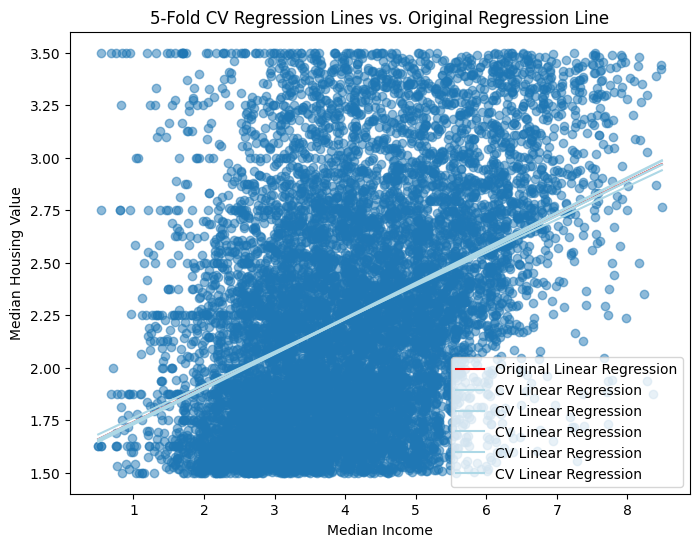

In [5]:
from sklearn.model_selection import KFold

# Setup 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1948)

# Store coefficients for each fold
coefficients = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_cv = LinearRegression()
    model_cv.fit(X_train, y_train)
    
    # Store the coefficients (slope, intercept)
    coefficients.append((model_cv.coef_[0], model_cv.intercept_))

# Plot
# Create a scatter plot for regression model
plt.figure(figsize=(8, 6))

# Scatter plot with the regression line
plt.scatter(X, y, alpha=0.5) # Making dots semi-transparent

# Plot the regression lines
plt.plot(X_range, y_ols, color='red', label='Original Linear Regression')

# Plot the CV regression lines in light blue
for coef in coefficients:
    y_cv = coef[0] * X_range + coef[1]
    plt.plot(X_range, y_cv, color='lightblue', label='CV Linear Regression')

plt.title('5-Fold CV Regression Lines vs. Original Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median Housing Value')
plt.legend()

plt.show()

1. The cross-validation regression lines are quite close to each other and to the original regression line. This consistency indicates that the model is stable across different subsets of the data.

2. The slight variations among the CV regression lines demonstrate how the model's parameters can change when trained on different subsets of the data. However, these variations are minimal, suggesting that the linear relationship between median income and median housing value is robust.

3. The original regression line estimated with the full dataset lies within the range of the CV regression lines, supporting the notion that it provides a reliable estimate of the relationship between median income and median housing value.

# Part 2: Gradient Descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (median income)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the median house value on the median income. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries in 1.1? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: We recommend including a MaxIterations parameter in their gradient descent algorithm, to make sure things don't go off the rails, i.e., as a safeguard in case your algorithm isn't converging as it should. *

In [18]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    coefficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    
    # Initialize parameters
    alpha, beta = 0, 0  # intercept and slope
    m = len(xvalues)  # number of observations
    
    # Initialize tracking for convergence
    convergence = False
    iteration = 0
    cost_history = []

    while not convergence and iteration < MaxIterations:
        # Predictions
        yhat = alpha + beta * xvalues
        
        # Compute error
        error = yhat - yvalues
        
        # Gradient calculation
        gradient_alpha = (1/m) * np.sum(error)
        gradient_beta = (1/m) * np.sum(error * xvalues)
        
        # Update parameters
        alpha -= R * gradient_alpha
        beta -= R * gradient_beta
        
        # Compute cost (Mean Squared Error)
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        
        # Convergence check (using cost function)
        if iteration > 0 and np.abs(cost_history[-1] - cost_history[-2]) < 0.0001: # Cost close to epsilon
            convergence = True
        
        iteration += 1
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print(f'Learning rate: {R} with {iteration} iterations')
    return alpha, beta

In [19]:
# Prepare data for gradient descent
X = cal_df['MedInc']
y = cal_df['MedHouseVal']

# Learning rates to experiment with
learning_rates = [0.01, 0.001, 0.0001]

# Results dictionary
results = {}

for R in learning_rates:
    results[R] = bivariate_ols(X, y, R=R, MaxIterations=1000)

results

Time taken: 0.19 seconds
Learning rate: 0.01 with 356 iterations
Time taken: 0.08 seconds
Learning rate: 0.001 with 183 iterations
Time taken: 0.42 seconds
Learning rate: 0.0001 with 1000 iterations


{0.01: (0.5200693595109731, 0.39942889414252836),
 0.001: (0.1307830440046539, 0.4715781061377312),
 0.0001: (0.10695703143868203, 0.4168294726637933)}

Comparing to those estimated through standard libraries in 1.1, there are some differences in alpha and beta, depending on the learning rate R. The learning rate affects the speed of convergence and the exact values at which the algorithm converges.

The differences in alpha and beta across different R values indicate the sensitivity of gradient descent to the choice of learning rate, as well as the importance of tuning this parameter for optimal performance.

### 2.2 Data normalization

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code to standardize your features. 

**For all the following questions, unless explicitly asked otherwise, you are expected to standardize appropriately. Recall that in settings where you are using holdout data for validation or testing purposes, this involves substracting the average and dividing by the standard deviation of your training data.**

In [11]:
'''
Function
--------
standardize
    Column-wise standardization of a target dataframe using the mean and std of a reference dataframe

Parameters
----------
ref,tar : pd.DataFrame
    ref: reference dataframe
    tar: target dataframe
    
Returns
-------
tar_norm: pd.DataFrame
    Standardized target dataframe
'''
def standardize(ref,tar):
    tar_norm = ((tar - np.mean(ref, axis = 0)) / np.std(ref, axis = 0))
    return tar_norm

# Examples
# Standardize train: standardize(ref=x_train,tar=x_train)
# Standardize test: standardize(ref=x_train,tar=x_test)

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using `MedInc`, `HouseAge` and `AveRooms` as independent variables. Remember to standardize appropriately before inputting them to the gradient descent algorithm. How do your coefficients compare to the ones estimated through standard libraries?

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with three values of R (0.1, 0.01, and 0.001).

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [20]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    coefficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    
    m, n = xvalue_matrix.shape  # m: number of observations, n: number of features
    X = np.hstack((np.ones((m, 1)), xvalue_matrix))  # Add a column of ones for the intercept
    
    # Initialize parameters
    params = np.zeros(n + 1)  # Including intercept
    
    # Tracking convergence
    convergence = False
    iteration = 0
    cost_history = []

    while not convergence and iteration < MaxIterations:
        # Predictions
        yhat = np.dot(X, params)
        
        # Compute error
        error = yhat - yvalues
        
        # Gradient calculation
        gradient = np.dot(X.T, error) / m
        
        # Update parameters
        params = params - R * gradient
        
        # Compute cost (Mean Squared Error)
        cost = np.dot(error.T, error) / (2 * m)
        cost_history.append(cost)
        
        # Convergence check (using cost function)
        if iteration > 0 and np.abs(cost_history[-1] - cost_history[-2]) < 0.0001: # Cost close to epsilon
            convergence = True
        
        iteration += 1

    alpha = params[0]
    beta_array = params[1:]
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print(f'Learning rate: {R} with {iteration} iterations')
    return alpha, beta_array

In [26]:
# Standardize the features
X_multi = cal_df[['MedInc', 'HouseAge', 'AveRooms']]
X_norm = standardize(X_multi, X_multi)

# Results dictionary for multivariate regression
results_multi_norm = {}

# Gradient decent to minimize OLS with different values of R
for R in learning_rates:
    results_multi_norm[R] = multivariate_ols(X_norm.values, y, R=R, MaxIterations=1000)

results_multi_norm

Time taken: 0.06 seconds
Learning rate: 0.01 with 314 iterations
Time taken: 0.15 seconds
Learning rate: 0.001 with 1000 iterations
Time taken: 0.17 seconds
Learning rate: 0.0001 with 1000 iterations


{0.01: (2.150189161219427, array([ 0.22674923,  0.07270436, -0.013933  ])),
 0.001: (1.4200754396407704, array([0.1387094 , 0.03114481, 0.01166935])),
 0.0001: (0.21373318462899785, array([0.0207674 , 0.00241338, 0.00437939]))}

1. Comparing to the ones estimated through standard libraries in 1.1, the coefficients for MedInc consistently show a positive relationship with median house value across different learning rates, which is alined with standard library estimates. However, the impact of HouseAge and AveRooms on the median house value can vary depending on the learning rate and model specification, indicating the impact of feature selection and standardization in regression analysis.

2. With 1000 iterations, the coefficients with learning rate 0.001 and 0.0001 are closer to zero compared to the higher learning rate, indicating a slower convergence and possibly less accurate estimation within the given iteration limit.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm? Compare to the results you would obtain using standard libraries. 

In [24]:
# Results dictionary for multivariate regression with non-standardized variables
results_multi_non_std = {}

# Gradient decent to minimize OLS with different values of R
for R in learning_rates:
    results_multi_non_std[R] = multivariate_ols(X_multi.values, y, R=R, MaxIterations=1000)

results_multi_non_std

/Users/kaiting/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
/Users/kaiting/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in subtract


Time taken: 0.20 seconds
Learning rate: 0.01 with 1000 iterations
Time taken: 0.04 seconds
Learning rate: 0.001 with 263 iterations
Time taken: 0.15 seconds
Learning rate: 0.0001 with 780 iterations


{0.01: (nan, array([nan, nan, nan])),
 0.001: (0.03923459201233196, array([0.18967125, 0.02644546, 0.11222109])),
 0.0001: (0.01946467559562215, array([0.10488031, 0.03880652, 0.10053207]))}

1. Generally, the running time is longer under the same learning rate when varaibles are not standardized. Specifically, a high learning rate failed to converge and shown as "nan", likely due to the scale differences in the features.

2. Standard libraries typically are less sensitive to feature scale variations, providing more robust estimates without the need for manual tuning of the learning rate. It is less likely to see the result like "nan" for coefficients.

# 3. Prediction

Let's use our fitted model to make predictions about housing prices. 

### 3.1 Cross-validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be four, corresponding to the intercept and the three coefficients for `MedInc` and `AveRooms`, `HouseAge`). Since there are 5 folds, there will be 5 sets of four coefficients -- report them all in a 5x4 table.

**Note:** You can use KFold to perform the cross-validation. 

In [28]:
def compute_rmse(predictions, yvalues):
    P = np.array(predictions)
    Y = np.array(yvalues)
    rmse = ((P-Y)**2).sum()*1.0 / len(P) 
    rmse = np.sqrt(rmse)
    return rmse

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1948)
coefficients = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model = LinearRegression().fit(X_train, y_train)
    
    # Collect the coefficients (including the intercept)
    coeffs = np.append(model.intercept_, model.coef_)
    coefficients.append(coeffs)

# Convert coefficients list to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=['Intercept', 'MedInc', 'AveRooms', 'HouseAge'])

coefficients_df

,Intercept,MedInc,AveRooms,HouseAge
0,2.249617,0.260129,0.093842,-0.026684
1,2.246008,0.256349,0.082749,-0.027758
2,2.244567,0.253866,0.086075,-0.033918
3,2.243217,0.259089,0.086478,-0.041023
4,2.245725,0.244642,0.084049,-0.029376


1. By using 5-fold cross-validation to refit the multivariate regression from 2.3, the coeeficients are close to the ones with a higher learning rate.

2. The coefficients for MedInc are positive in all folds, indicating a higher median income is associated with higher median house values. The positive association of median income and average rooms with house value is also intuitive and reflects common real estate valuation factors. The slight negative association of house age with house value indicates that newer homes, or those in better condition, might be valued more highly.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [34]:
# Prepare the data (assuming X and y are already defined)
kf = KFold(n_splits=5, shuffle=True, random_state=1948)
rmse = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model and make predictions
    model = LinearRegression().fit(X_train, y_train)
    yhat_test = model.predict(X_test)

    # Compute and store the RMSE for this fold
    rmse.append(compute_rmse(yhat_test, y_test))

# Calculate the average RMSE across all folds
avg_rmse = np.mean(rmse)

print(f'RMSE for each of the 5-folds: {rmse}')
print(f'The average RMSE: {avg_rmse}')

RMSE for each of the 5-folds: [0.5013166129337521, 0.4972505575773586, 0.4857748573971771, 0.490671772504879, 0.48698062456187835]
The average RMSE: 0.49239888499500906


1. The RMSE values for each fold will indicate the model's predictive accuracy on different subsets of the data, reflecting its consistency and generalization ability. The average RMSE provides an overall outcome of the model's performance across the entire dataset. 

2. The RMSE for the nearest neighbor algorithm from the previous problem set is 0.7501030101547084 if using optimal K. Comparing to this average RMSE, a lower RMSE indicates a better fit. In this case, the linear regression model provides a better prediction than KNN.

# 4 Regularization 

### 4.1 Get prepped

Step 1: Generate features consisting of all polynomial combinations of degree greater than 0 and less than or equal to 3 of the following features: `MedInc`, `HouseAge` and `AveRooms`. If you are using PolynomialFeatures of sklearn.preprocessing make sure you drop the constant polynomial feature (degree 0). You should have a total of 19 polynomial features. 

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Step 1
# Select the features to be transformed
features = cal_df[['MedInc', 'HouseAge', 'AveRooms']]

# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False) # exclude the bias (constant) term
poly_features = poly.fit_transform(features)

# Create a DataFrame for the polynomial features with appropriate column names
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features.columns))

# Step 2
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(poly_features_df, cal_df['MedHouseVal'], test_size=0.2, random_state=1948)

### 4.2 Complexity and overfitting?

Now, using your version of multivariate regression from 2.3, let's try to build a more complex model. **Remember to standardize appropriately!** Using the training set, regress the median house value on the polynomial features using your multivariate ols algorithm. Calculate train and test RMSE. Is this the result that you were expecting? How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [45]:
# Standardize the features
X_train_norm = standardize(X_train, X_train)
X_test_norm = standardize(X_train, X_test)

# Fit the model using the multivariate OLS algorithm on the training data
alpha, beta_array = multivariate_ols(X_train_norm, y_train, R=0.01, MaxIterations=1000)

# Add an intercept column of ones to the features matrix X
# Train set
X_train_intercept = np.ones((X_train_norm.shape[0], 1))
X_train_with_intercept = np.hstack((X_train_intercept, X_train_norm))

# Test set
X_test_intercept = np.ones((X_test_norm.shape[0], 1))
X_test_with_intercept = np.hstack((X_test_intercept, X_test_norm))

# Calculate predictions: y = alpha + X*beta
yhat_train = np.dot(X_train_with_intercept, np.append(alpha, beta_array))
yhat_test = np.dot(X_test_with_intercept, np.append(alpha, beta_array))

# Calculate RMSE
rmse_train = compute_rmse(yhat_train, y_train)
rmse_test = compute_rmse(yhat_test, y_test)

print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')

Time taken: 0.09 seconds
Learning rate: 0.01 with 313 iterations
Train RMSE: 0.49193392072650693, Test RMSE: 0.5009441595083064


1.It is likely to expect a higher risk of overfitting, typically evidenced by a lower training RMSE and a much higher test RMSE. However, the results indicate that the model is robust, with minimal overfitting.

2.The RMSEs are very similar to the average RMSE in 3.2 (0.492). It suggests that by adding polynomial features and increasing the model's complexity, it did not significantly overfit the training data, as one might expect with polynomial features. Instead, it managed to maintain a similar level of error, showing an improvement in model fit without compromising generalization.

Both the training and test RMSEs for the polynomial features model are significantly lower than the test RMSE obtained using the optimal K=25 in the nearest neighbors approach (0.7501). This indicates that the regression model provides a better fit to the data and generalizes better to unseen data than the nearest neighbor model with the optimal K found.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model using all the polynomial features on your training data and using the value lambda = 10^4.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [47]:
def multivariate_regularized_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000, lmbda=0):
    start_time = time.time()
    
    # Number of observations and features
    m, n = xvalue_matrix.shape
    # Add a column of ones to the feature matrix to include the intercept in the optimization
    X = np.hstack([np.ones((m, 1)), xvalue_matrix])
    
    # Initialize coefficients (including intercept) with zeros
    params = np.zeros(n + 1)
    
    for iteration in range(MaxIterations):
        # Predicted values
        yhat = np.dot(X, params)
        
        # Error
        error = yhat - yvalues
        
        # Gradient for the cost function
        gradient = np.dot(X.T, error) / m + (lmbda / m) * params
        
        # Update rule for gradient descent with regularization for coefficients
        params -= R * gradient
        
        # No regularization for the intercept term
        params[0] -= (lmbda / m) * params[0]
    
    # Coefficients
    alpha = params[0]
    beta_array = params[1:]

    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [49]:
# Fit the model using the multivariate OLS algorithm on the training data
alpha, beta_array = multivariate_regularized_ols(X_train_norm, y_train, R=0.01, MaxIterations=1000, lmbda=10**4)

# Add an intercept column of ones to the features matrix X
# Train set
X_train_intercept = np.ones((X_train_norm.shape[0], 1))
X_train_with_intercept = np.hstack((X_train_intercept, X_train_norm))

# Test set
X_test_intercept = np.ones((X_test_norm.shape[0], 1))
X_test_with_intercept = np.hstack((X_test_intercept, X_test_norm))

# Calculate predictions: y = alpha + X*beta
yhat_train = np.dot(X_train_with_intercept, np.append(alpha, beta_array))
yhat_test = np.dot(X_test_with_intercept, np.append(alpha, beta_array))

# Calculate RMSE
rmse_train = compute_rmse(yhat_train, y_train)
rmse_test = compute_rmse(yhat_test, y_test)

print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")

Time taken: 0.24 seconds
Train RMSE: 2.3082762995817636, Test RMSE: 2.288491224793382


1. The train and test RMSEs are very close to each other when using Ridge regularization, which indicates a good balance between bias and variance. The model is neither overfitting nor underfitting significantly, as shown by the similar performance on both training and testing sets.

2. The results using Ridge are significaltly higher than the ones in 4.2, suggesting that it might be a trade-off of reducing overfitting and ensuring generalization. Hence, the the model is less closely fitting the training data.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda in a regression using all the polynomial features. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a gold line showing the cross-validated RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calculate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 3.2, 4.2, 4.3 and to the RMSE from nearest neighbors? What do you make of these results? 

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch!

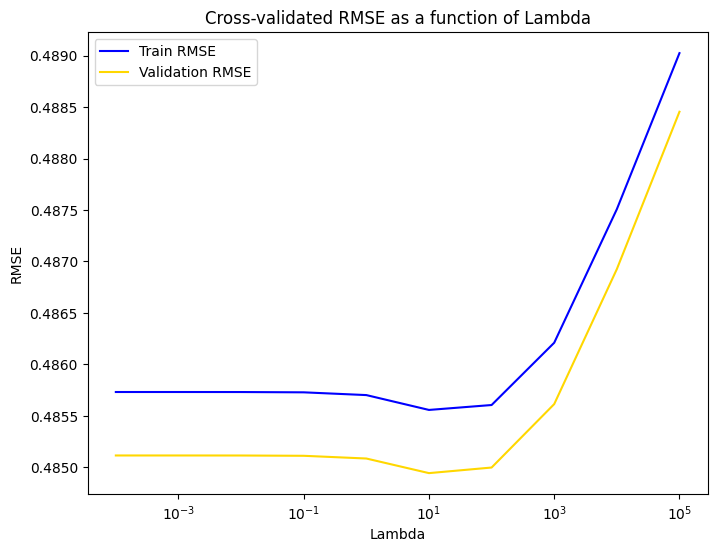

Optimal lambda: 10.0


In [74]:
# # Standardize the features
# X_train_norm = standardize(X_train, X_train)
# X_test_norm = standardize(X_train, X_test)

lambdas = np.logspace(-4, 5, num=10)
# For each value of lambda
# Use k-fold cross-validation to compute the average cross-validated RMSE for that lambda value,
# computed as the average across the held-out folds.
# You should also record the average cross-validated train RMSE
# computed as the average across the folds used for training. 
rmse_cv_train = []
rmse_cv_val = []

for lmbda in lambdas:
    rmse_fold_train = []
    rmse_fold_val = []
    kf = KFold(n_splits=5, shuffle=True, random_state=1948)
    
    for train_index, val_index in kf.split(X_train_norm):
        # Split data
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Training the model with the current lambda
        model = Ridge(alpha=lmbda, fit_intercept=True, random_state=42)
        model.fit(X_train, y_train)
        
        # Predictions for training and test set of this fold
        yhat_fold_train = model.predict(X_fold_train)
        yhat_fold_val = model.predict(X_fold_val)
        
        # RMSE for this fold
        rmse_fold_train.append(compute_rmse(yhat_fold_train, y_fold_train))
        rmse_fold_val.append(compute_rmse(yhat_fold_val, y_fold_val))
    
    rmse_cv_train.append(np.mean(rmse_fold_train))
    rmse_cv_val.append(np.mean(rmse_fold_val))

# Plot RMSE vs. Lambda
plt.figure(figsize=(8, 6))
plt.plot(lambdas, rmse_cv_train, 'b-', label='Train RMSE')
plt.plot(lambdas, rmse_cv_val, 'gold', label='Validation RMSE')

plt.title('Cross-validated RMSE as a function of Lambda')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Finding the lambda that minimizes cross-validated test RMSE
optimal_lambda = lambdas[np.argmin(rmse_cv_val)]
print(f'Optimal lambda: {optimal_lambda}')

In [87]:
model = Ridge(alpha=optimal_lambda)
model.fit(X_train, y_train)
yhat_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, yhat_test))
print(f"Test RMSE (sklearn Ridge with optimal lambda={optimal_lambda}): {rmse_test}")

Test RMSE (sklearn Ridge with optimal lambda=10.0): 0.4880909236395498


3.2: 0.492
4.2: Train 0.4919, Test 0.5009
4.3: Train 2.3083, Test 2.2885
KNN: 0.7501

1. The optimal lambda that minimizes the CV RMSE is 10 wich is close to the predicted value from 3.2 and 4.2, suggesting that the regularization slightly improves generalization comparing to non-regularized and mitigates overfitting. Both the training and test RMSEs are lower than the test RMSE obtained from either 4.3 or using the optimal K=25 in the nearest neighbors approach (0.750) from Problem Set 3. This indicates that too much regularization can degrade the model's predictive accuracy and the regularized polynomial regression provides a better fit and prediction compared to KNN.

2. The optimal lambda of 10.0 for ridge regularization offers a good compromise between model complexity and generalization ability with the lower RMSEs compared to both the unregularized model and models with inappropriate levels of regularization.

### 4.5: Compare your results to sklearn ridge

Repeat your analysis in 4.4, but this time use the sklearn implementation of ridge regression (sklearn.linearmodel.Ridge). Are the results similar? How would you explain the differences, if any?

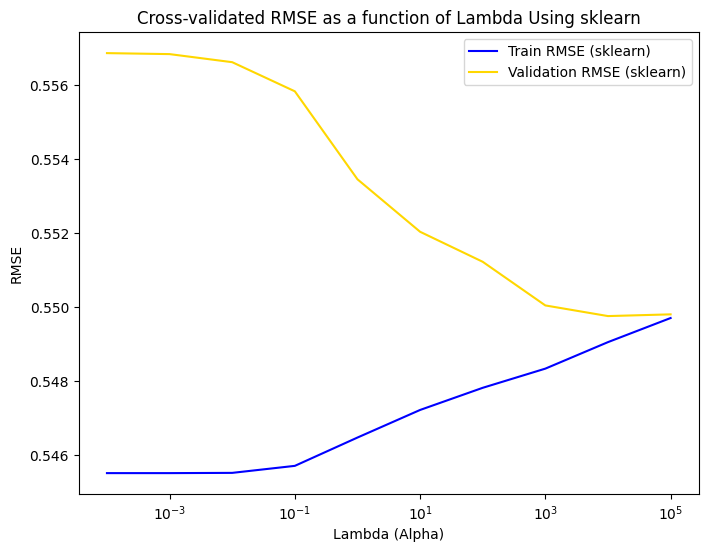

In [82]:
# Define lambdas (alphas for sklearn's Ridge)
rmse_cv_train_sklearn = []
rmse_cv_val_sklearn = []

kf = KFold(n_splits=5, shuffle=True, random_state=1948)

for alpha in lambdas:
    rmse_fold_train = []
    rmse_fold_val = []
    
    for train_index, val_index in kf.split(X_train_norm):
        X_train_fold, X_val_fold = X_train_norm.iloc[train_index], X_train_norm.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit Ridge model
        model = Ridge(alpha=alpha)
        model.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate RMSE for this fold
        yhat_train = model.predict(X_train_fold)
        yhat_val = model.predict(X_val_fold)
        
        rmse_fold_train.append(np.sqrt(mean_squared_error(y_train_fold, yhat_train)))
        rmse_fold_val.append(np.sqrt(mean_squared_error(y_val_fold, yhat_val)))
    
    rmse_cv_train_sklearn.append(np.mean(rmse_fold_train))
    rmse_cv_val_sklearn.append(np.mean(rmse_fold_val))

# Plot RMSE vs. Lambda for sklearn Ridge
plt.figure(figsize=(8, 6))
plt.plot(lambdas, rmse_cv_train_sklearn, 'b-', label='Train RMSE (sklearn)')
plt.plot(lambdas, rmse_cv_val_sklearn, 'gold', label='Validation RMSE (sklearn)')

plt.title('Cross-validated RMSE as a function of Lambda Using sklearn')
plt.xscale('log')
plt.xlabel('Lambda (Alpha)')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [88]:
# Finding the alpha that minimizes cross-validated test RMSE
optimal_alpha = lambdas[np.argmin(rmse_cv_val_sklearn)]
model_sklearn = Ridge(alpha=optimal_alpha)
model_sklearn.fit(X_train, y_train)
yhat_test_sklearn = model_sklearn.predict(X_test)

test_rmse_sklearn = np.sqrt(mean_squared_error(y_test, yhat_test_sklearn))
print(f"Test RMSE (sklearn Ridge with optimal alpha={optimal_alpha}): {test_rmse_sklearn}")

Test RMSE (sklearn Ridge with optimal alpha=10000.0): 0.49160339133017356


Ｔhe optimal alpha is 10000 with a sklearn ridge RMSE 0.4916 due to the trade-off between complexity and generalization.